# Scientific Python Tutorial for Dummies

In [2]:
import numpy as np # pip install numpy
import pandas as pd # pip install pandas
# import scipy # pip install scipy
from matplotlib import pyplot as plt # pip install matplotlib
from scipy import signal # pip install scipy

# import financial indicators library
import ta

## Numpy
Work with matrices

Create matrix

In [3]:
m = np.array([1,2,3,4]) # (4,)
a = np.array([5,6,7,8]) # (4,)
ones = np.ones((10,1)) # create a matrix of ones of the given shape
zeros = np.zeros((20,1)) # create a matrix of zeros of the given shape

Perform Operations on matrices

In [19]:
print(m.shape)
print(m.reshape(4,1))


(4,)
[[1]
 [2]
 [3]
 [4]]


In [28]:
print(m.reshape(2,2)) # reshape matrix to new dimension
print(np.concatenate([m.reshape(4,1),a.reshape(4,1)], axis = 1)) # concatenation matrices.
print(m*a) # element-wise multiplication similar to Matlab. Similar for division and addition
print(np.dot(m,a)) # dot product
print(np.matmul(m,a)) # matrix multiplication

[[1 2]
 [3 4]]
[[1 5]
 [2 6]
 [3 7]
 [4 8]]
[ 5 12 21 32]
70
70


create an arbitary matrix, reshape

In [18]:
np.array([[1,2],[3,4]])

(2, 2)

## Scipy - scientific functions
Probabily distributions, filters, MA models, Convolutions, Filters, Correlations -- Similar to Matlab or R, I believe. If not certain check docs.

In [39]:
from scipy import stats 
a1 = np.random.randn(100,1) # random matrices are taken from numpy. However distributions are taken from scipy - check docs.
a2 = np.random.randn(100,1)
a_corr = signal.correlate(a1, a2)
# print(signal.correlate(a1, a2).shape)
# plt.plot(a1)
# plt.plot(a2)
# plt.plot(a_corr)
# corr = stats.pearsonr(a1, a2)
# print(corr)

## Pandas - work with tabular data
If your data has strings, or you need operations similar to Excel -> Pandas. Have similar functions to numpy, scipy. Industry standard, used everywhere.

In [46]:
df = pd.DataFrame({'close':[0.1, 0.2, 0.3, 0.4], 'open': [0.0,0.1,0.2,0.3]})
print(df[0:3]) # slice your data Frame
print(df['close']) # slice your column
print(df.pop('close')) # pop your column - remove it from the data frame and return this column
print(df)
# y = df.pop('y')
print(df.drop(columns=['open'])) # drop your column - remove it from the dataframe and return the new dataframe
# df1 = df[['close', 'open']]

   close  open
0    0.1   0.0
1    0.2   0.1
2    0.3   0.2
0    0.1
1    0.2
2    0.3
3    0.4
Name: close, dtype: float64
0    0.1
1    0.2
2    0.3
3    0.4
Name: close, dtype: float64
   open
0   0.0
1   0.1
2   0.2
3   0.3
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


## Plot Graphs - use matplotlib

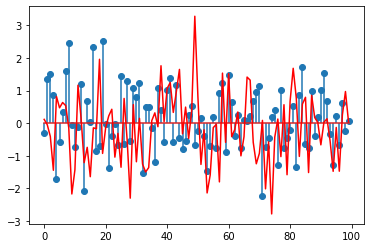

In [54]:
#  plot your noise
# simple plot
plt.stem(a1)
plt.plot(a2, c='red')

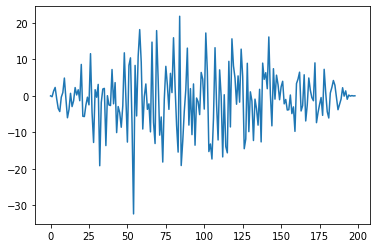

In [55]:
# advanced plot
# create figure and axis separately
plt.plot(a_corr)

## Generate Features - generate features
Use financial indicators from https://technical-analysis-library-in-python.readthedocs.io/en/latest/


In [2]:
# import financial indicators library
import ta
# load data from csv file
data = pd.read_csv('BTCUSDT_4h.csv')
# data = pd.read_csv("C:\\Users\\Sergei\\Documents\\4th_Year\\Computing\\ScipyTutorialForNoobs\\BTCUSDT_4h.csv")
# slice the last 400 data points
data = data[-400:].reset_index(drop=True)

In [69]:
# data

In [57]:
data_ema = ta.trend.ema_indicator(data['close'])
# print data head first file datapoints
print(data_ema)

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
395    56341.228097
396    56497.436082
397    56693.262839
398    56863.587017
399    56799.987476
Name: ema_12, Length: 400, dtype: float64


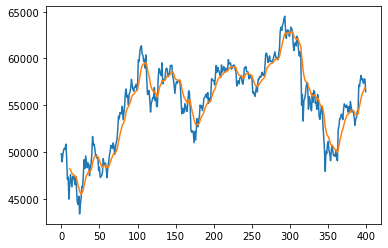

In [76]:
# plot data and data_ema
plt.plot(data['close'])
plt.plot(data_ema)
# plt.plot()

## Create and Test your signal system using Backtest - run your backtest

In [55]:
from backtest import Backtest, Random_Strategy


In [6]:
# random strategy
# Give it ticker get random signal
# signals
# -1 - Sell
# 0 - Idle
# 1 - Buy

class Random_Strategy:
    def __init__(self, *args, **kwargs):
        self._last_signal = None
    
    def get_signal(self,ticker):
        return np.random.randint(-1,2)

In [49]:

# class Ninja:
#     def __init__(self, hp, attack):
#         self.hp = hp
#         self.attack = attack

# class Orc_Warrior():
#     def __init__(self, hp, attack):
#         self.hp = hp
#         self.attack = attack
    
#     def get_hp(self):
#         return self.hp

#     def damage(self, target):
#         # print(target)
#         # print('Attack')
        
#         # print(target.hp)
#         target.hp = target.hp - self.attack


# orc1 = Orc_Warrior(10, 2)
# orc2 = Orc_Warrior(8, 2)
# ninj1 = Ninja(4,4)
# # orc1.hp -= 2
# # print(orc1)
# # print(orc1.hp)
# # print(ninj1)
# orc1.damage(orc2)
# print(orc2.hp)
# # print(orc2.hp)

In [9]:
# a = 10
str1 = "Hello Python".split(" ")
# l = [1,2,3,4,5]
print(str1)

['Hello', 'Python']


-0.018878120569278137
257
Correlation: 0.6454405340033375


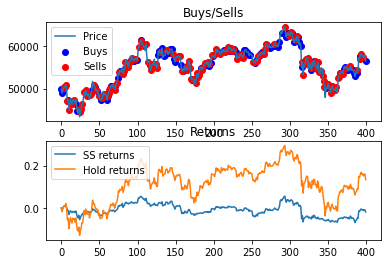

In [23]:
# create your backtest
balance_counter =  100
bt = Backtest(balance_counter, order_volume_prop=0.2)

# read your tickers
tickers = pd.read_csv('BTCUSDT_4h.csv')
#slice tickers 
tickers = tickers[-400:]
tickers = tickers.reset_index()
N = len(tickers)

random_strategy = Random_Strategy()


for i in range(N):
    # signal = signals[i]
    ticker = tickers.iloc[i]
    signal = random_strategy.get_signal(ticker)

    bt.run(ticker,signal)


print(bt.get_return())
print((bt.total_trades()))
# computes correlation between trading returns and hold
print('Correlation: {}'.format(bt.get_correlation()))
fig = bt.visualise()
plt.show()


## Machine Learning - Sklearn and XGBoost

In [66]:
import sklearn
from sklearn.ensemble import RandomForestRegressor


### Data Preprocessing

In [67]:
# prepare your data
# lets predict the next price from previous 10 prices and ema prices
# your X will be 10 close prices and 10 ema prices and your y will be the next price
data = pd.read_csv('BTCUSDT_4h.csv') # DataFrame
# print(len(data))
# slice the last 1500 points
data = data[-1500:] # DataFrame
prices = data['close'] # get close prices. pd.Series
prices_ema = ta.trend.ema_indicator(prices) # pd.Series
prices = pd.DataFrame(prices) # create DataFrame because prices was Series
prices['ema'] = prices_ema # pd.DataFrame - 2 columns

prices = prices.dropna() # drop nans
# print(prices.head())

# prices
nb_prev_points = 10
# create target data
y = prices['close'][nb_prev_points:]
y = y.reset_index(drop=True)
# create input Data --- split your dataset in slices of nb_prev_points
# X = prices
X_columns = []
prices_columns = [X_columns.extend(["prev_price{}".format(nb_prev_points-i), "prev_ema{}".format(nb_prev_points-i)]) for i in range(nb_prev_points)]
# emas_columns = ["prev_ema{}".format(nb_prev_points-i) for i in range(nb_prev_points)]
# X_columns = prices_columns + emas_columns
N = len(y)
X = pd.DataFrame({}) # create empty dataframe
for i in range(N):
    prices_slice = prices[i:i+nb_prev_points].to_numpy()
    # prices_slice = np.concatenate([prices_slice[:,0],prices_slice[:,1]])
    # print(prices_slice.shape)
    df_tmp = pd.DataFrame(prices_slice.reshape(1,nb_prev_points*2), columns=X_columns)
    # print(df_tmp)
    X = pd.concat([X,df_tmp])
X = X.reset_index(drop=True)
# X.pop('index')
# print(X.head())
# verify that X length and Y lenth are the same
print(len(X))
print(len(y))

1479
1479


#### Data Normalisation
Data Normalisation generaliy improves speed of convergence. It's also necessary to use it to train RNN and LSTM model. Normalising your data allows you to make your data stochastic and fit your estimator better. For stock or currency prices general trend is one of the problems. This trend needs to be removed to improve estimator accuracy.

In [120]:
# detrend function
# this function splits input into windows and detrends it using polynomial fit
def detrend(X, order= 5, window_size = 50):
    N = X.shape[0]
    nb_windows = N // window_size
    out = np.empty(X.shape)
    trends = []
    stds = []
    for i in range(nb_windows):
        sample =  X[i*window_size:(i+1)*window_size]
        # print(len(sample))
        p_coeffs = np.polyfit(np.linspace(i*window_size,(i+1)*window_size, window_size), sample, order)
        p = np.poly1d(p_coeffs)

        # p_coeffs_line = np.polyfit(np.linspace(0,window_size, window_size), sample, 1)
        # p_line = np.poly1d(p_coeffs_line)
        trend = p(np.linspace(i*window_size,(i+1)*window_size, window_size))
        sample = sample - trend
        # sample = (sample - p(np.linspace(0,window_size, window_size)))/p_line(np.linspace(0,window_size, window_size)) # normalised sample
        sample_std = np.std(sample)
        sample = sample/sample_std


        out[i*window_size:(i+1)*window_size] = sample # save normalised sample

        trends.append(trend) # save trend
        stds.append(sample_std)
    
    # detrend the rest of the input
    sample = X[(i+1)*window_size:] # select the rest of the input
    sample_N = len(sample)

    p_coeffs = np.polyfit(np.linspace((i+1)*window_size,N, sample_N), sample, order)
    p = np.poly1d(p_coeffs)

    # p_coeffs_line = np.polyfit(np.linspace(0,sample_N, sample_N), sample, 1)
    # p_line = np.poly1d(p_coeffs_line)
    trend = p(np.linspace((i+1)*window_size,N, sample_N))
    sample = sample - trend
    # sample = (sample - p(np.linspace(0,sample_N, sample_N)))/p_line(np.linspace(0,sample_N, sample_N)) # normalised sample

    sample_std = np.std(sample)
    sample = sample/sample_std

    out[(i+1)*window_size:] = sample # save normalised sample
    stds.append(sample_std)

    
    trends.append(trend) # save trends 

    return out, np.concatenate(trends, axis = 0), np.array(stds)

In [144]:
# do data preprocessing
# train, valid and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy(), test_size=0.2, shuffle=False)


# y_train_min = np.min(y_train)
# y_train_max = np.max(y_train)
# y_train = 
N = X_train.shape[0]

# Min Scaler Normalisation
scaler = 1.1
X_train_min = np.min(X_train['prev_price1']) * scaler
X_train_max = np.max(X_train['prev_price1']) * scaler

X_train = (X_train - X_train_min)/(X_train_max - X_train_min)
X_test = (X_test - X_train_min)/(X_train_max - X_train_min)

# normalise target
y_train = (y_train - X_train_min)/(X_train_max - X_train_min)
y_test = (y_test - X_train_min)/(X_train_max - X_train_min)



# y_train = (y_train - y_train_min)/(y_train_max - y_train_min)
# y_test = (y_test - y_train_min)/(y_train_max - y_train_min)

# X_train_mean = (X_train.mean()['prev_price1'])
# X_train_std = (X_train.std()['prev_price1'])

# X_train = (X_train - X_train_mean)/X_train_std
# X_test = (X_test - X_train_mean)/X_train_std


# Normalise train using detrend method
# ws = 50
# for column in X_train.columns:
#     if column == 'prev_price1':
#         X_train[column], trends, _ = detrend(X_train[column], order = 1, window_size=ws)
#     else:
#         X_train[column], _, _ = detrend(X_train[column], order = 1, window_size=ws)

# for column in X_test.columns:
#     X_test[column], _, _ = detrend(X_test[column], order = 1, window_size=ws)


# Normalise test 

# normalise target 
# y_train = detrend(y_train)
# normalise target 
# y_test = detrend(y_test)


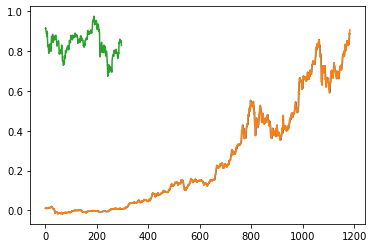

In [142]:
# p_coeffs
# plt.plot(X_train['prev_price1'] + trends)
# plt.plot(trends)
plt.plot(X_train['prev_price1'])
# plt.plot(X_train['prev_ema1'])
# plt.plot(X_train['prev_price1'] - p(np.linspace(0,N,N)))
plt.plot(y_train)
plt.plot(y_test)

#### Visualise

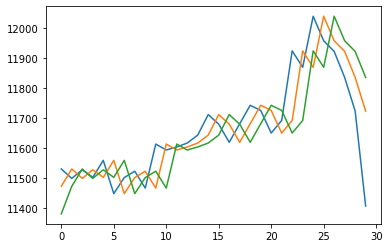

In [36]:
# visualise
plt.plot(X_train['prev_price1'][0:30])
plt.plot(X_train['prev_price2'][0:30])
plt.plot(X_train['prev_price3'][0:30])




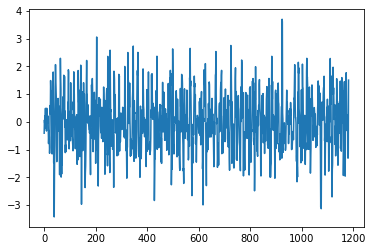

In [35]:
plt.plot(X_train['prev_price2'])
# plt.plot(price_polyfit)
# plt.plot(y_test)

### Model Training

In [7]:
# Define your ML model
regr = RandomForestRegressor(max_depth=4, random_state=0)
# regr2 = RandomForestRegressor(max_depth=4, random_state=0)
# train your random forest
regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=4, random_state=0)

(0.8000555785289234, 3.3431135022197674e-67)


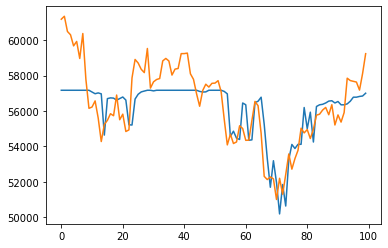

In [8]:
from scipy import stats
y_pred = regr.predict(X_test)

plt.plot(y_pred[0:100])
plt.plot(y_test[0:100])
corr = stats.pearsonr(y_pred, y_test)
print(corr)


## Neural Networks - using PyTorch
Same as above we predict the next price from previous prices using neural networks

In [128]:
# import PyTorch
import torch
# import stats from scipy library
from scipy import stats

In [129]:
# DEFINE DEVICE
# Similar to Tensorflow and other NN libraries. PyTorch allows to use GPU to accelerate training and inference time. In PyTorch this implemented with function torch.device and parameter device
##### For GPU #######
# check if cuda is available. CUDA is name of GPU core used by NVIDIA. NVIDIA has weird namings which confuses many computer architects.
if torch.cuda.is_available():
    print('CUDA')
    device = torch.device("cuda")     
else:
    print('CPU')
    device = torch.device("cpu")

CUDA


In [130]:
# define Data Generator. Data generators are used save memory and not create new matrices or to create a simple loop pattern. Think about it as a custom For Loop :)
def my_generator(X, y, batch_size):
    # N = len(X)
    N = X.shape[0]
    # idx = np.linspace(0,N,N)
    # print(N)
    nb_batches = int(N//batch_size)
    # print(nb_batches)
    for i in range(nb_batches):
        # print(i)
        X_batch = torch.tensor(X[i*batch_size:(i+1)*batch_size, :], device=device, dtype = dtype)
        # print(X_batch.shape)
        y_batch = torch.tensor(y[i*batch_size:(i+1)*batch_size], device=device, dtype = dtype)
        yield X_batch, y_batch # alternative to return but called multiple times
    
    

In [131]:
# convert your time series data to time series sequences
def to_time_series_sequences(X, y, seq_size, padding = 0):
    N = X.shape[0]
    N_out = N-seq_size + 1
    nb_inputs = X.shape[-1]
    # nb_outputs = y.shape[-1]
    X_out = np.empty((N-seq_size+1, seq_size, nb_inputs))
    y_out = np.empty((N-seq_size+1))
    for i in range(seq_size, N):
        # print(i-seq_size, i)
        X_out[i-seq_size, :, :] = X[i-seq_size:i, :]
        y_out[i-seq_size] = y[i-1]

    
    return X_out, y_out


### Full-Connected ANN

FOR MISHA

Basic principles of training
Suppose we have input $X$ with M features and we have target output. Lets make a simple MA model which take weighted sum of inputs and predicts the output. Mathematically this is described as:
$$
\hat{y} = \omega \times X
$$
Now we need to train our model. To do this we use gradient descent algorithm. The essential principles behind GD algorithm are loss computation, gradients computation and weights update. We start from defining our loss function. I will use MSE:
$$
\mathcal{L} = \frac{1}{2}(y - \hat{y})^2
$$
The GD weight update algorithm is defined as below (This is also known as Newtons Optimisation Method or Newtons Iteration Method. I dont fcking remember, anyway it does not matter):
$$
w^+ = w - \alpha \frac{\partial \mathcal{L}}{\partial \omega} X
$$
where $\alpha$ is an optimisation step constant. This constant is selected such that we achieve the best possible optimisation along the direction chosen by $\frac{\partial \mathcal{L}}{\partial \omega}$. This is done with by applying Line Search Algorithm. For simplicity we choose $\alpha$ to be a constant  $\mu$ that we call - learning rate. $\mu$ is typically between 0.001 and 0.1. In case of NNs we make it 0.001 or 1e-3:
$$
w = w - \mu \frac{\partial \mathcal{L}}{\partial \omega} X
$$
GD was extended to work with multiple layers and sequence of parameters. The new method is called Backpropagation. Use Wiki to familirise yourself with it. \\
The weight update algorithm or optimisation algorithm described above is the most basic optimisation. NNs use more advanced optimisation methods to speed up learning, i.e. Adam. There is no need to know them in great details as they generally do the same thing. On the other hand you do need to know about different Loss functions and how they are computed. Each Loss function is suitable for particular tasks or problem you are trying to solve. In our case we have a regression problem, we predict a number so the loss function to use must reflect the difference between 2 numbers. 

In [103]:
# define neural network model
# the easies way to pass parameters to your model is to create a dictionary and pass all parameters as a single variable
nb_inputs = 20 # define number of input features. In our case we have price and ema and their 10 previous observations => 2*10 = 20. We have 20 features!
nb_outputs = 1 #  define number of outputs. Our model predicts future price => we have 1 output
batch_size = 64 # batch_size is used to speed up training. If batch size is 1 - Loss is computed from a single sample. If batch size > 1 the Loss is computed 
# as an average between samples in the particular batch, i.e. MSE is computed for all samples of batch of size 64 and than the average is take between these 64 samples
dtype = torch.float32 # we define the data type. It's import that we have a single data type for all variable in our Network
# save variables in a dict
param = {
    'nb_inputs': nb_inputs,
    'nb_outputs': nb_outputs,
    'linear1_nb_hidden': 30,
    'linear2_nb_hidden': 15,
    'p': 0.2, # dropout probability
    # 'linear1_nb_hidden': ,
}

# define model. In PyTorch Model is defined by inhereting a new class from torch.nn.Module. This means we create an object which has similar function as torch.nn.Module. Then we extend this 
# object with features we like. In our case with layers
class LinearModel(torch.nn.Module):
    def __init__(self, param):
        super(LinearModel, self).__init__() # this required to initilise all torch.nn.Module functions and internal variables
        # we initialise a linear layer (FC layer). torch.nn.Linear was also inherited from torch.nn.Module!!!
        self.linear1 = torch.nn.Linear(param['nb_inputs'], param['linear1_nb_hidden']).to(device) # (batch_size,20) -> (batch_size,linear1_nb_hidden)
        # we repeat for another linear layer. Linear layer requires to tell it the number of input and the number of outputs. .to(device) is used to send this Layer to the device we use for training
        self.linear2 = torch.nn.Linear(param['linear1_nb_hidden'],param['linear2_nb_hidden']).to(device) # (batch_size,linear1_nb_hidden) -> (batch_size,linear2_nb_hidden)
        self.linear3 = torch.nn.Linear(param['linear2_nb_hidden'], param['nb_outputs']).to(device) # (batch_size,linear2_nb_hidden) -> (batch_size,nb_outputs)

        # define activation function
        self.relu = torch.nn.ReLU()

        # define Dropout
        self.dropout = torch.nn.Dropout(p=param['p'])

    # neural networks do 2 runs . Forward - they predict. Backward - compute gradients and update parameters.
    # We need to define the how our Modules defined above are connected with each other. For this we use forward function
    def forward(self, x):
        # x is the input to our model
        x = self.linear1(x) # input is applied to the first layer and saved to variable x
        x = self.relu(x)
        x = self.dropout(x)
        x = self.linear2(x) # we do the same for the second layer
        # x = self.relu(x)
        # x = self.dropout(x)
        x = self.linear3(x).squeeze() # .squeeze() is used to remove unit dimensions, i.e. (64,1) -> (64,). 
        return x


x = torch.randn((batch_size, nb_inputs), device=device) # create a random matrix to test our model
model = LinearModel(param) # compile model. create an object.

print(model(x).shape) # check model output dimenstion

# compute total number of parameters
total_params = 0
for p in model.parameters():
    total_params +=torch.prod(torch.tensor(p.shape))
    # print((p.shape))
print('Total Number params: {}'.format(total_params))

torch.Size([64])
Total Number params: 1111


Text(0, 0.5, 'Test Correlation')

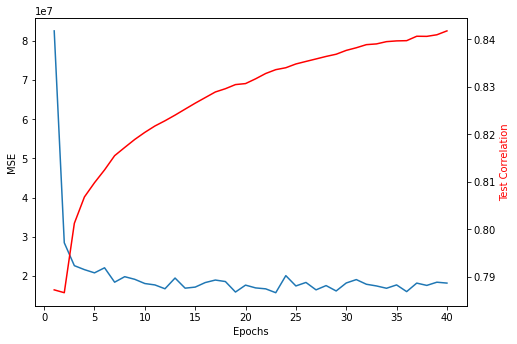

In [105]:
# train loop
batch_size = 32
# epoch are used to train your nat longer than the number of data points you have
nb_epochs = 40
# compile your model
model = LinearModel(param)
# define Loss function
loss_fn = torch.nn.MSELoss() 
# define optimiser
lr = 1e-3
optimizer = torch.optim.Adamax(model.parameters(), lr=lr,betas=(0.9,0.999))

# record losses for visualisation
loss_hist = []
corrs = []
for e in range(nb_epochs):
    # create list for losses
    local_loss = []
    # turn on training
    model.train()
    for x_batch, y_batch in my_generator(X_train.to_numpy(), y_train, batch_size):
        # compute model prediction
        # print(x_batch.shape)
        output = model(x_batch)
        
        # compute loss
        loss_val = loss_fn(output, y_batch)
        # reset optimiser gradients to zero
        optimizer.zero_grad()
        # compute gradients
        loss_val.backward()
        # perform weights update
        optimizer.step()
        # add loss to local losses
        local_loss.append(loss_val.item())
    
    # compute mean loss for this epoch
    mean_loss = np.mean(local_loss)
    # add mean loss to loss hist
    loss_hist.append(mean_loss)


    # compute test correlation
    # turn off training
    model.eval()
    y_pred = model(torch.tensor(X_test.to_numpy(), device=device, dtype=dtype))
    y_pred = y_pred.cpu().detach().numpy()

    corr = stats.pearsonr(y_pred, y_test)

    corrs.append(corr[0])

plt.close()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(np.arange(1,nb_epochs+1),np.array(loss_hist).T)
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')
ax2 = ax.twinx()
ax2.plot(np.arange(1,nb_epochs+1),np.array(corrs).T, c='red')
ax2.set_ylabel('Test Correlation', color='red')


In [106]:
# test Loop correlation
y_pred = model(torch.tensor(X_test.to_numpy(), device=device, dtype=dtype))
y_pred = y_pred.cpu().detach().numpy()

corr = stats.pearsonr(y_pred, y_test)
print(corr)



(0.8417935553787602, 1.0422282691349187e-80)


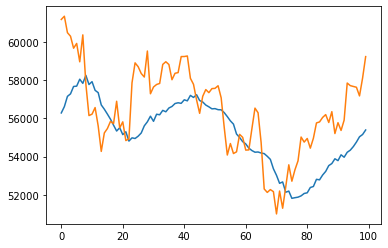

In [107]:
# plot predicted test sample 
y_pred = model(torch.tensor(X_test.to_numpy(), device=device, dtype=dtype))
y_pred = y_pred.cpu().detach().numpy()
plt.plot(y_pred[0:100])
plt.plot(y_test[0:100])

### Recurrent Neural Networks
Recurrent NN works with time series data such as:
Input: (nb_steps, nb_inputs). You input data has a shape of nb_steps x nb_inputs such as you have your inputs varying in time. In our case we have 2 features: price and ema. They vary in time for 10 time steps. At the moment our data has a shape of (1,20) where all data time-varying features are in the single dimension. We need to reshape it to (10,2). We do this with .reshape((10,2)) function.
Recurrent Layer is an FC layer with 2 advances - it feeds its output back to its inputs and it has an internal state.
FC layer equation:
$$
y = \sigma(X \times \omega) === \sigma((1,20) \times (20,1))
$$
where $\sigma$ is the activation function and $\omega$ is the weight matrix. RNN equation is defined as:
$$
y[n] = \sigma(X[n] \times \omega + y[n-1] \times \nu)
$$
where $\nu$ is the internal state matrix. Internal state matrix has dimension (nb_hidden, nb_hidden) where nb_hidden is the number of hidden neurons in the particular layer.

In [112]:
# prepare dataset
seq_size = 2
X_train_seq, y_train_seq = to_time_series_sequences(X_train.to_numpy(), y_train, seq_size)
X_test_seq, y_test_seq = to_time_series_sequences(X_test.to_numpy(), y_test, seq_size)

print(y_train_seq.shape)

(1182,)


In [133]:
# define neural network model
# the easies way to pass parameters to your model is to create a dictionary and pass all parameters as a single variable
nb_inputs = nb_prev_points*2 # define number of input features. In our case we have price and ema and their 10 previous observations => 2*10 = 20. We have 20 features!
nb_outputs = 1 #  define number of outputs. Our model predicts future price => we have 1 output
batch_size = 32 # batch_size is used to speed up training. If batch size is 1 - Loss is computed from a single sample. If batch size > 1 the Loss is computed 
# as an average between samples in the particular batch, i.e. MSE is computed for all samples of batch of size 64 and than the average is take between these 64 samples
dtype = torch.float32 # we define the data type. It's import that we have a single data type for all variable in our Network
# nb_features = 2 # we have prev price and prev ema
# save variables in a dict
param = {
    'nb_inputs': nb_inputs,
    'nb_outputs': nb_outputs,
    'nb_rnn1_hidden': 80,
    'nb_rnn1_layers': 1,
    'nb_rnn2_hidden': 15,
    'nb_rnn2_layers': 1,
    'seq_size': seq_size,
    'p': 0.2, # dropout probability
    # 'linear1_nb_hidden': ,
}

# define model. In PyTorch Model is defined by inhereting a new class from torch.nn.Module. This means we create an object which has similar function as torch.nn.Module. Then we extend this 
# object with features we like. In our case with layers
class RNNModel(torch.nn.Module):
    def __init__(self, param):
        super(RNNModel, self).__init__() # this required to initilise all torch.nn.Module functions and internal variables
        # create RNN layer
        self.nb_rnn1_hidden = param['nb_rnn1_hidden']
        self.rnn1 = torch.nn.RNN(param['nb_inputs'], param['nb_rnn1_hidden'], param['nb_rnn1_layers'], bias = False, nonlinearity = 'relu', dropout = 0).to(device)
        # self.linear3 = torch.nn.Linear(param['nb_rnn1_hidden']*nb_prev_points, param['nb_outputs']).to(device) # (batch_size, nb_rnn1_hidden*nb_prev_points) -> (batch_size,nb_outputs)
        self.linear3 = torch.nn.Linear(param['nb_rnn1_hidden'], param['nb_outputs']).to(device) # (batch_size, nb_rnn1_hidden) -> (batch_size,nb_outputs)


        # define activation function
        self.relu = torch.nn.ReLU()

        # define Dropout
        self.dropout = torch.nn.Dropout(p=param['p'])

    # neural networks do 2 runs . Forward - they predict. Backward - compute gradients and update parameters.
    # We need to define the how our Modules defined above are connected with each other. For this we use forward function
    def forward(self, x):
        # x is the input to our model
        x, _ = self.rnn1(x) # input size must be (nb_steps, batch_size, nb_inputs)
        # x = self.relu(x)
        # x = self.dropout(x)
        x = x[-1,:,:] # select the last output
        # x = x.reshape(batch_size, nb_prev_points*self.nb_rnn1_hidden)
        x = self.linear3(x).squeeze() # .squeeze() is used to remove unit dimensions, i.e. (64,1) -> (64,). 
        return x


# x = torch.randn((nb_prev_points, batch_size, nb_inputs), device=device) # create a random matrix to test our model
for x_batch, y_batch in my_generator(X_train_seq, y_train_seq, batch_size):
    x_batch = x_batch.reshape((seq_size, batch_size, nb_inputs))
    print(x_batch.shape)
    print(y_batch.shape)
    break
model = RNNModel(param) # compile model. create an object.

print(model(x_batch.reshape(seq_size, batch_size, nb_inputs)).shape) # check model output dimenstion

# compute total number of parameters
total_params = 0
for p in model.parameters():
    total_params +=torch.prod(torch.tensor(p.shape))
    # print((p.shape))
print('Total Number params: {}'.format(total_params))


torch.Size([2, 32, 20])
torch.Size([32])
torch.Size([32])
Total Number params: 8081


Text(0, 0.5, 'Test Correlation')

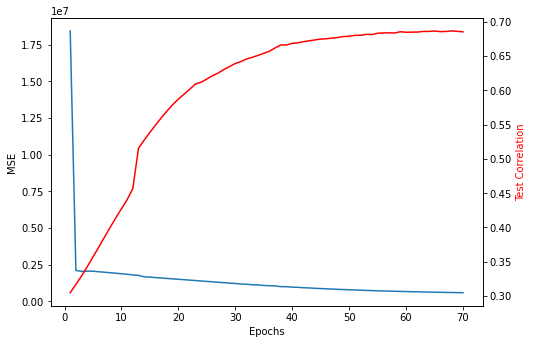

In [146]:
# Training loop
batch_size = 16
# epoch are used to train your nat longer than the number of data points you have
nb_epochs = 70
# compile your model
model = RNNModel(param)
# define Loss function
loss_fn = torch.nn.MSELoss() 
# define optimiser
lr = 1e-3
optimizer = torch.optim.Adamax(model.parameters(), lr=lr,betas=(0.9,0.999))

# record losses for visualisation
loss_hist = []
corrs = []
for e in range(nb_epochs):
    # create list for losses
    local_loss = []
    # turn on training
    model.train()
    for x_batch, y_batch in my_generator(X_train_seq, y_train_seq, batch_size):
        x_batch = x_batch.reshape((seq_size, batch_size, nb_inputs))
        # print(x_batch.shape)
        # print(y_batch.shape)
        # compute model prediction
        # print(x_batch.shape)
        output = model(x_batch)
        # print(output.shape)
        # compute loss
        loss_val = loss_fn(output, y_batch)
        # reset optimiser gradients to zero
        optimizer.zero_grad()
        # compute gradients
        loss_val.backward()
        # perform weights update
        optimizer.step()
        # add loss to local losses
        local_loss.append(loss_val.item())
    
    # compute mean loss for this epoch
    mean_loss = np.mean(local_loss)
    # add mean loss to loss hist
    loss_hist.append(mean_loss)


    # compute test correlation
    # turn off training
    model.eval()
    local_corrs = []
    for x_batch, y_batch in my_generator(X_test_seq, y_test_seq, batch_size):
        x_batch = x_batch.reshape((seq_size, batch_size, nb_inputs))
        output = model(x_batch)
        # loss_val = loss_fn(output, y_batch)
        # local_loss.append(loss_val.item())
        output = output.cpu().detach().numpy()
        y_batch = y_batch.cpu().detach().numpy()
        # print(output)
        corr = stats.pearsonr(output, y_batch)
        local_corrs.append(corr[0])
    
    corrs.append(np.mean(local_corrs))

plt.close()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(np.arange(1,nb_epochs+1),np.array(loss_hist).T)
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')
ax2 = ax.twinx()
ax2.plot(np.arange(1,nb_epochs+1),np.array(corrs).T, c='red')
ax2.set_ylabel('Test Correlation', color='red')


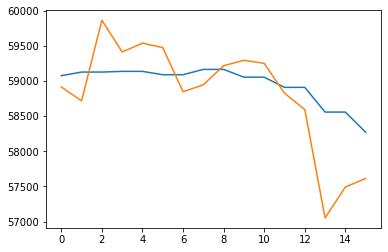

In [153]:
k = 7
for x_batch, y_batch in my_generator(X_test_seq[batch_size*k:], y_test_seq[batch_size*k:], batch_size):
        x_batch = x_batch.reshape((seq_size, batch_size, nb_inputs))
        output = model(x_batch)
        break

output = output.cpu().detach().numpy()
y_batch = y_batch.cpu().detach().numpy()


plt.plot(output)
plt.plot(y_batch)

### LSTM
LSTM is "hack" which solves long-term memory problem. In theory RNN should have both short and long memories. However in practice RNN forgets things in the long-term. Here comes LSTM which introduces another channel for long-term memory. For detailed explanation, please, follow this link - (I am too lazy to explain this myself).

In [148]:
# prepare dataset
seq_size = 2
X_train_seq, y_train_seq = to_time_series_sequences(X_train.to_numpy(), y_train, seq_size)
X_test_seq, y_test_seq = to_time_series_sequences(X_test.to_numpy(), y_test, seq_size)

print(y_train_seq.shape)

(1182,)


In [180]:
# define neural network model
# the easies way to pass parameters to your model is to create a dictionary and pass all parameters as a single variable
nb_inputs = nb_prev_points*2 # define number of input features. In our case we have price and ema and their 10 previous observations => 2*10 = 20. We have 20 features!
nb_outputs = 1 #  define number of outputs. Our model predicts future price => we have 1 output
batch_size = 64 # batch_size is used to speed up training. If batch size is 1 - Loss is computed from a single sample. If batch size > 1 the Loss is computed 
# as an average between samples in the particular batch, i.e. MSE is computed for all samples of batch of size 64 and than the average is take between these 64 samples
dtype = torch.float32 # we define the data type. It's import that we have a single data type for all variable in our Network
# nb_features = 2 # we have prev price and prev ema
# save variables in a dict
param = {
    'nb_inputs': nb_inputs,
    'nb_outputs': nb_outputs,
    'nb_lstm1_hidden': 50,
    'nb_lstm1_layers': 1,
    'nb_lstm2_hidden': 15,
    'nb_lstm2_layers': 1,
    'seq_size': seq_size,
    'p': 0.2, # dropout probability
    # 'linear1_nb_hidden': ,
}

# define model. In PyTorch Model is defined by inhereting a new class from torch.nn.Module. This means we create an object which has similar function as torch.nn.Module. Then we extend this 
# object with features we like. In our case with layers
class LSTMModel(torch.nn.Module):
    def __init__(self, param):
        super(LSTMModel, self).__init__() # this required to initilise all torch.nn.Module functions and internal variables
        # create RNN layer
        self.nb_lstm1_hidden = param['nb_lstm1_hidden']
        self.lstm1 = torch.nn.LSTM(param['nb_inputs'], param['nb_lstm1_hidden'], param['nb_lstm1_layers'], bias = False, dropout = 0, batch_first = True).to(device)
        # self.linear3 = torch.nn.Linear(param['nb_rnn1_hidden']*nb_prev_points, param['nb_outputs']).to(device) # (batch_size, nb_rnn1_hidden*nb_prev_points) -> (batch_size,nb_outputs)
        self.linear3 = torch.nn.Linear(param['nb_lstm1_hidden'], param['nb_outputs']).to(device) # (batch_size, nb_rnn1_hidden) -> (batch_size,nb_outputs)


        # define activation function
        self.relu = torch.nn.ReLU()

        # define Dropout
        self.dropout = torch.nn.Dropout(p=param['p'])

    # neural networks do 2 runs . Forward - they predict. Backward - compute gradients and update parameters.
    # We need to define the how our Modules defined above are connected with each other. For this we use forward function
    def forward(self, x):
        # x is the input to our model
        x, _ = self.lstm1(x) # input size must be (nb_steps, batch_size, nb_inputs)
        # x = self.relu(x)
        # x = self.dropout(x)
        x = x[:,-1,:] # select the last output
        # x = x.reshape(batch_size, nb_prev_points*self.nb_rnn1_hidden)
        x = self.linear3(x).squeeze() # .squeeze() is used to remove unit dimensions, i.e. (64,1) -> (64,). 
        return x


# x = torch.randn((nb_prev_points, batch_size, nb_inputs), device=device) # create a random matrix to test our model
for x_batch, y_batch in my_generator(X_train_seq, y_train_seq, batch_size):
    # x_batch = x_batch.reshape((seq_size, batch_size, nb_inputs))
    print(x_batch.shape)
    print(y_batch.shape)
    break
model = LSTMModel(param) # compile model. create an object.

# print(model(x_batch.reshape(seq_size, batch_size, nb_inputs)).shape) # check model output dimenstion
print(model(x_batch).shape)
# compute total number of parameters
total_params = 0
for p in model.parameters():
    total_params +=torch.prod(torch.tensor(p.shape))
    # print((p.shape))
print('Total Number params: {}'.format(total_params))


torch.Size([64, 2, 20])
torch.Size([64])
torch.Size([64])
Total Number params: 14051


Text(0, 0.5, 'Test Correlation')

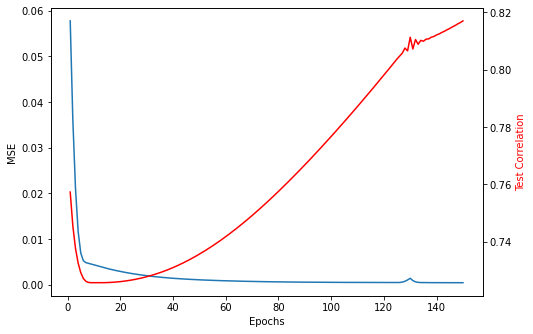

In [181]:
# Training loop
# batch_size = 16
# epoch are used to train your nat longer than the number of data points you have
nb_epochs = 150
# compile your model
model = LSTMModel(param)
# define Loss function
loss_fn = torch.nn.MSELoss() 
# define optimiser
lr = 1e-3
optimizer = torch.optim.Adamax(model.parameters(), lr=lr,betas=(0.9,0.999))

# record losses for visualisation
loss_hist = []
corrs = []
for e in range(nb_epochs):
    # create list for losses
    local_loss = []
    # turn on training
    model.train()
    for x_batch, y_batch in my_generator(X_train_seq, y_train_seq, batch_size):
        # x_batch = x_batch.reshape((seq_size, batch_size, nb_inputs))
        # print(x_batch.shape)
        # print(y_batch.shape)
        # compute model prediction
        # print(x_batch.shape)
        output = model(x_batch)
        # print(output.shape)
        # compute loss
        loss_val = loss_fn(output, y_batch)
        # reset optimiser gradients to zero
        optimizer.zero_grad()
        # compute gradients
        loss_val.backward()
        # perform weights update
        optimizer.step()
        # add loss to local losses
        local_loss.append(loss_val.item())
    
    # compute mean loss for this epoch
    mean_loss = np.mean(local_loss)
    # add mean loss to loss hist
    loss_hist.append(mean_loss)


    # compute test correlation
    # turn off training
    model.eval()
    local_corrs = []
    for x_batch, y_batch in my_generator(X_test_seq, y_test_seq, batch_size):
        # x_batch = x_batch.reshape((seq_size, batch_size, nb_inputs))
        output = model(x_batch)
        # loss_val = loss_fn(output, y_batch)
        # local_loss.append(loss_val.item())
        output = output.cpu().detach().numpy()
        y_batch = y_batch.cpu().detach().numpy()
        # print(output)
        corr = stats.pearsonr(output, y_batch)
        local_corrs.append(corr[0])
    
    corrs.append(np.mean(local_corrs))

plt.close()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(np.arange(1,nb_epochs+1),np.array(loss_hist).T)
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')
ax2 = ax.twinx()
ax2.plot(np.arange(1,nb_epochs+1),np.array(corrs).T, c='red')
ax2.set_ylabel('Test Correlation', color='red')


Hello!
torch.Size([64, 2, 20])
torch.Size([64])


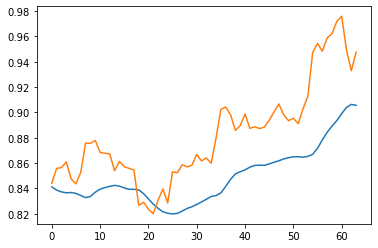

In [184]:
k = 2
for x_batch, y_batch in my_generator(X_test_seq[batch_size*k:], y_test_seq[batch_size*k:], batch_size):
        # x_batch = x_batch.reshape((seq_size, batch_size, nb_inputs))
        print("Hello!")
        print(x_batch.shape)
        output = model(x_batch)
        print(output.shape)
        break

output = output.cpu().detach().numpy()
y_batch = y_batch.cpu().detach().numpy()


plt.plot(output)
plt.plot(y_batch)

## Create a Strategy which uses Machine Learning

### Strategy

In [55]:
class MLStrategy():
    def __init__(self, model, nn=False, nb_prices = 30) -> None:
        # save your model
        self.model = model
        self.prev_price = None
        self.prev_prices = []
        self.X = pd.DataFrame({})
        self.nn = nn
        self.nb_prices = nb_prices
        
    def get_signal(self, ticker):
        # idle for the first iteration
        # if self.prev_price == None:
        #     self.prev_price = ticker['prev_price1']
        #     self.prev_prices.append(ticker['prev_price1'])
        #     return 0
        price = ticker['close']
        # print(price)

        # update inputs for your model
        if len(self.prev_prices) < self.nb_prices:
            # self.X['close'] = pd.concat([X['close'], price])
            # print('Trigger')
            self.prev_prices.append(price)
            # print(self.prev_prices)
            self.prev_price = ticker['close']
            return 0 # Idle
        else:
            # self.X['close'] = pd.concat([X['close'][1:], price])
            # self.X['ema'] = ta.trend.ema_indicator(X['close'])
            # print(self.prev_prices)
            self.prev_prices = self.prev_prices[1:] + [price]
            # print(self.prev_prices)
            self.X['close'] = self.prev_prices
            self.X['ema'] = ta.trend.ema_indicator(self.X['close'])

        
        # print('Previous prices are')
        # print(self.X)
        # take previous 10 prices
        X_in = self.X[-10:]
        # print(X_in.to_numpy().reshape(1,20))
        if self.nn:
            X_in = X_in.to_numpy().reshape(1,20) # get matrix data
            X_in = torch.tensor(X_in, device=device, dtype=dtype) # create torch tensor
            pred_price =self.model(X_in).item()
        else:
            pred_price = self.model.predict(X_in.to_numpy().reshape(1,20))

        # print(pred_price - self.prev_price)
        if pred_price > 1.03*self.prev_price:
            # if price will go up by more than 10 per cent => buy
            self.prev_price = ticker['close']
            return 1

        elif pred_price < 0.97*self.prev_price:
            # if price will be lower by more than 10 percent => sell
            self.prev_price = ticker['close']
            return -1
        
        else:
            # do nothing => Idle
            self.prev_price = ticker['close']
            return 0


### Backtest

In [57]:
%reload_ext autoreload
%autoreload 2

%aimport backtest
from backtest import Backtest

In [58]:
# Test your ML strategy
# create your backtest
balance_counter =  100
balance_base = 0.001
w1 = 1
# bt = Backtest(balance_counter*w1, order_volume_prop=0.4)
bt = Backtest(balance_counter*w1, order_volume_prop=0.1)

# create dataFrame for tickers
tickers = pd.DataFrame({})
tickers['close'] = X_test['prev_price1']
N = len(tickers)

# init your ml strategy above
nn = True
if nn:
    # NN
    ml_strategy = MLStrategy(model, nn=True)

else:
    # RF
    ml_strategy = MLStrategy(regr, nn=False)

for i in range(N):
    ticker = tickers.iloc[i]
    # print(ticker)
    signal = ml_strategy.get_signal(ticker)
    # print(signal)
    bt.run(ticker,signal)


print(bt.get_return())
print((bt.total_trades()))
# computes correlation between trading returns and hold
print('Correlation: {}'.format(bt.get_correlation()))
fig = bt.visualise()
plt.show()


RuntimeError: input must have 3 dimensions, got 2

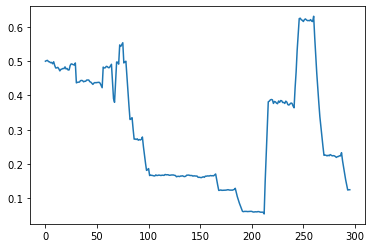

In [50]:
# print portfolio proportions
portfolio_props = bt.get_portfolio_proportions()
plt.plot(portfolio_props)